In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 
df = pd.read_csv('Figure_4b.csv')
df2 = pd.read_csv('Figure_4.csv')

In [2]:
df.columns


Index(['Commune_Number', 'Commune_Name', 'EPCI_Number',
       'Very_Low_Income_Population_Count',
       'Very_Low_Income_Population_Percent'],
      dtype='object')

In [3]:
df2population = df2[['Population_active_emploi_2019', 'Categorie_densite']]

In [4]:
df2population

,Population_active_emploi_2019,Categorie_densite
0,111.054917,Rural à habitat dispersé non périurbain
1,5865.256952,Urbain
2,864.691358,Bourgs ruraux périurbains
3,56.000000,Rural à habitat dispersé non périurbain
4,1270.000000,Rural à habitat dispersé non périurbain
...,...,...
34731,120.000000,Rural à habitat dispersé périurbain
34732,187.494380,Rural à habitat dispersé périurbain
34733,NaN,NaN
34734,NaN,NaN


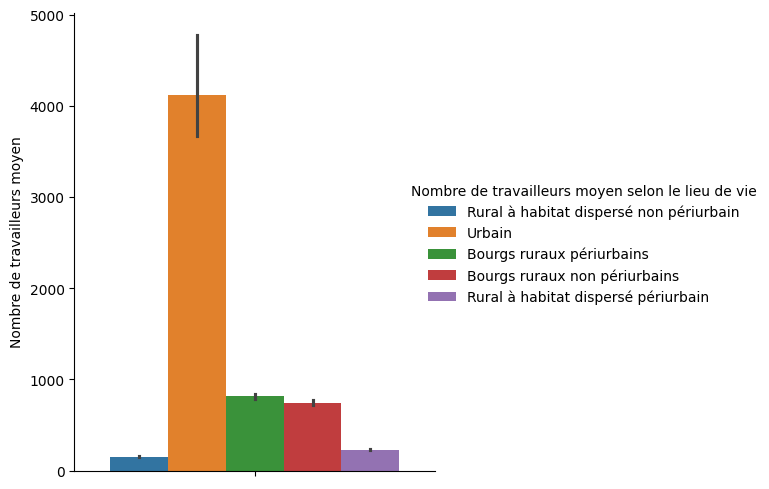

In [5]:
g = sns.catplot(
    data=df2population, kind="bar",
    hue="Categorie_densite", y="Population_active_emploi_2019")
g.set_axis_labels("", "Nombre de travailleurs moyen")
g.legend.set_title("Nombre de travailleurs moyen selon le lieu de vie")

On représente ici les effectifs de population active en foction da catégirie de densité de l'endroit où les personnes habitent. On remarque sans surprise que ce sont les zones urbaines qui l'emportent avec plus de 4000 travailleurs par commune. De plus, les zones avec la plus faible densité de population sont les zones où il y a le moins de travailleurs.

On remarque également que pour les villes l'incertitude est la plus haute, et plus vers les hautes populations : il y a en effet des villes de taille très variées (dont de très grosses) ce qui augmente cette valeur.

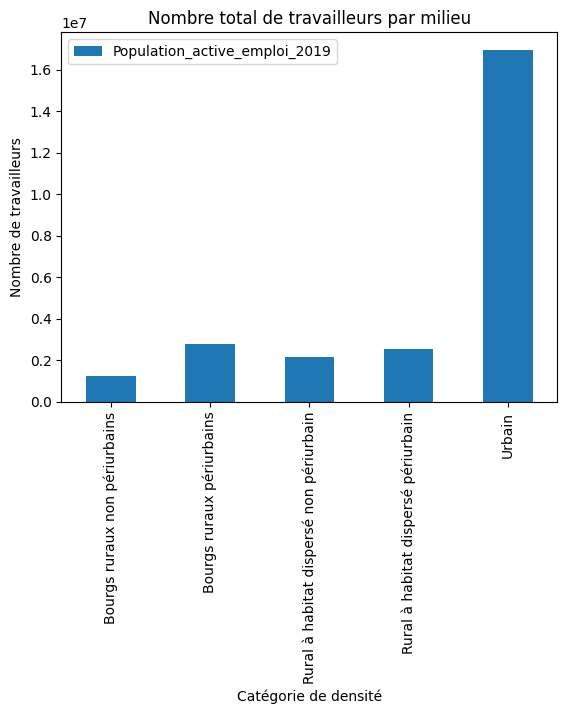

In [6]:
by_method = df2population.groupby('Categorie_densite')

counts = by_method.sum()
counts.plot(kind='bar')

plt.title('Nombre total de travailleurs par milieu')
plt.xlabel('Catégorie de densité')
plt.ylabel('Nombre de travailleurs')


# Affichage
plt.show()

In [7]:

fusion_df = pd.merge(df, df2, left_on='Commune_Name', right_on='Libelle_commune_2022', how='inner')
fusion_df.to_csv('fichier_fusionne.csv', index=False)
fusion_df.columns


Index(['Commune_Number', 'Commune_Name', 'EPCI_Number',
       'Very_Low_Income_Population_Count',
       'Very_Low_Income_Population_Percent', 'Code_commune_Insee_2022',
       'Libelle_commune_2022', 'Population_active_emploi_1999',
       'Distance_mediane_domicile_travail_1999_km',
       'Population_active_emploi_2019',
       'Distance_mediane_domicile_travail_2019_km',
       'Ecart_distance_mediane_km', 'Evolution_distance_mediane_pct',
       'Categorie_densite'],
      dtype='object')

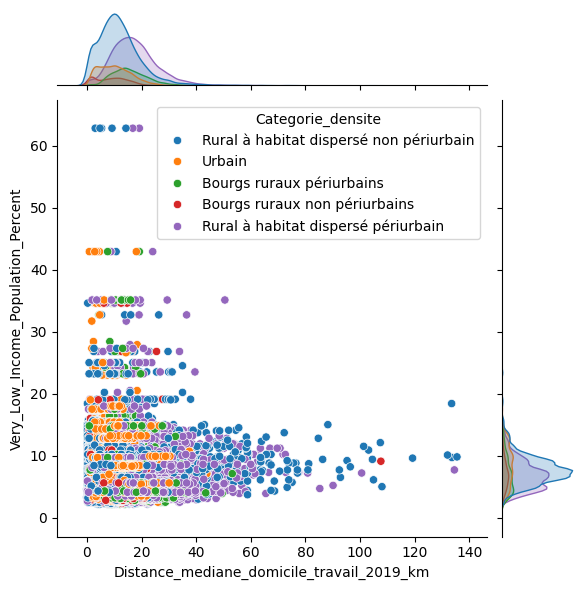

In [8]:
sns.jointplot(
    data=fusion_df,
    x='Distance_mediane_domicile_travail_2019_km',
    y='Very_Low_Income_Population_Percent',
     hue='Categorie_densite');

In [10]:
fusion_df.columns

Index(['Commune_Number', 'Commune_Name', 'EPCI_Number',
       'Very_Low_Income_Population_Count',
       'Very_Low_Income_Population_Percent', 'Code_commune_Insee_2022',
       'Libelle_commune_2022', 'Population_active_emploi_1999',
       'Distance_mediane_domicile_travail_1999_km',
       'Population_active_emploi_2019',
       'Distance_mediane_domicile_travail_2019_km',
       'Ecart_distance_mediane_km', 'Evolution_distance_mediane_pct',
       'Categorie_densite'],
      dtype='object')

In [11]:
df3 = fusion_df[['Very_Low_Income_Population_Count', 'Categorie_densite']]

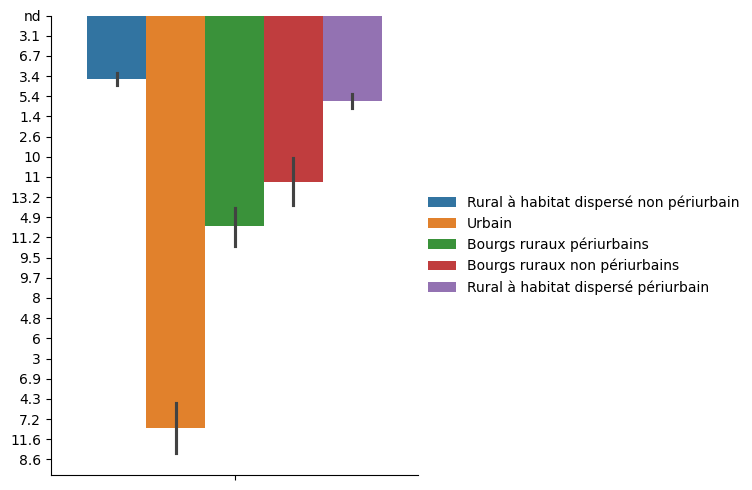

In [16]:
g = sns.catplot(
    data=df3, kind="bar",
    hue="Categorie_densite", y="Very_Low_Income_Population_Count")
g.set_axis_labels("", "")
g.legend.set_title("")